In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'C:\Users\ashwi\Downloads\Visa.csv')

In [2]:

new_column_names = {
    'F1_final': 'F1 final',
    'F2A_final': 'F2A final',
    'F2B_final': 'F2B final',
    '3rd_final': '3rd final',
    '4th_final': '4th final',
    'F1_filing': 'F1 filing',
    'Filing': 'F2A filing',
    'Unnamed: 8': 'F2B filing',
    'Unnamed: 9': '3rd filing',
    'Unnamed: 10': '4th filing',
    'Unnamed: 11': None,  # These columns will be dropped
    'Unnamed: 12': None,
    'Unnamed: 13': None,
    'Unnamed: 14': None,
    'Unnamed: 15': None,
    'Unnamed: 16': None,
    'Unnamed: 17': None
}


df.rename(columns=new_column_names, inplace=True)


df.dropna(axis=1, how='all', inplace=True)


print(df.head())


        Date F1 final F2A final F2B final 3rd final 4th final F1 filing  \
0  12/1/2001      NaN       NaN       NaN       NaN       NaN  3/1/1999   
1   1/1/2002      NaN       NaN       NaN       NaN       NaN  3/1/1999   
2   2/1/2002      NaN       NaN       NaN       NaN       NaN  3/1/1999   
3   3/1/2002      NaN       NaN       NaN       NaN       NaN  3/1/1999   
4   4/1/2002      NaN       NaN       NaN       NaN       NaN  3/1/1999   

   F2A filing F2B filing 3rd filing 4th filing  
0   9/22/1996  6/22/1993   5/8/1996  11/8/1989  
1   10/1/1996   7/1/1993   5/8/1996  12/1/1989  
2  10/22/1996   7/8/1993   5/8/1996   1/1/1990  
3  11/15/1996  7/22/1993  5/15/1996  1/22/1990  
4   12/8/1996   8/8/1993   6/1/1996  2/15/1990  


In [3]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col, pct_missing))

Date-0.025925925925925925%
F1 final-0.6407407407407407%
F2A final-0.6407407407407407%
F2B final-0.6407407407407407%
3rd final-0.6407407407407407%
4th final-0.6407407407407407%
F1 filing-0.025925925925925925%
F2A filing-0.025925925925925925%
F2B filing-0.025925925925925925%
3rd filing-0.025925925925925925%
4th filing-0.025925925925925925%


In [4]:
pd.set_option('display.max_rows', None)

In [5]:
df['Date'] = df['Date'].drop_duplicates()


In [6]:

df = pd.read_csv(r'C:\Users\ashwi\Downloads\Visa.csv')


def keep_dates_and_replace_non_numeric(value):
    try:
     
        pd.to_datetime(value)
        return value
    except ValueError:
        return ''


df = df.applymap(keep_dates_and_replace_non_numeric)


In [7]:
print(df.columns)


Index(['Date', 'F1 final', 'F2A final', 'F2B final', '3rd final', '4th final',
       'F1 filing', 'F2A filing', 'F2B filing', '3rd filing', '4th filing',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')


In [9]:
df.head()


,Date,F1 final,F2A final,F2B final,3rd final,4th final,F1 filing,F2A filing,F2B filing,3rd filing,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,2001-12-01,NaN,NaN,NaN,NaN,NaN,3/1/1999,9/22/1996,6/22/1993,5/8/1996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-01-01,NaN,NaN,NaN,NaN,NaN,3/1/1999,10/1/1996,7/1/1993,5/8/1996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-02-01,NaN,NaN,NaN,NaN,NaN,3/1/1999,10/22/1996,7/8/1993,5/8/1996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-03-01,NaN,NaN,NaN,NaN,NaN,3/1/1999,11/15/1996,7/22/1993,5/15/1996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-04-01,NaN,NaN,NaN,NaN,NaN,3/1/1999,12/8/1996,8/8/1993,6/1/1996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.dtypes

Date           datetime64[ns]
F1 final               object
F2A final              object
F2B final              object
3rd final              object
4th final              object
F1 filing              object
F2A filing             object
F2B filing             object
3rd filing             object
4th filing             object
Unnamed: 11           float64
Unnamed: 12           float64
Unnamed: 13           float64
Unnamed: 14           float64
Unnamed: 15           float64
Unnamed: 16           float64
Unnamed: 17           float64
Unnamed: 18           float64
Unnamed: 19           float64
Unnamed: 20           float64
Unnamed: 21           float64
Unnamed: 22           float64
Unnamed: 23           float64
Unnamed: 24           float64
dtype: object

In [11]:
# List of columns that you want to convert to datetime
date_columns = ['F1 final', 'F2A final', 'F2B final', '3rd final', '4th final',
                'F1 filing', 'F2A filing', 'F2B filing', '3rd filing', '4th filing']

# Convert the specified date columns to datetime
for column in date_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce')

# Now, the specified columns have been converted to datetime data type


In [12]:
df.dtypes

Date           datetime64[ns]
F1 final       datetime64[ns]
F2A final      datetime64[ns]
F2B final      datetime64[ns]
3rd final      datetime64[ns]
4th final      datetime64[ns]
F1 filing      datetime64[ns]
F2A filing     datetime64[ns]
F2B filing     datetime64[ns]
3rd filing     datetime64[ns]
4th filing     datetime64[ns]
Unnamed: 11           float64
Unnamed: 12           float64
Unnamed: 13           float64
Unnamed: 14           float64
Unnamed: 15           float64
Unnamed: 16           float64
Unnamed: 17           float64
Unnamed: 18           float64
Unnamed: 19           float64
Unnamed: 20           float64
Unnamed: 21           float64
Unnamed: 22           float64
Unnamed: 23           float64
Unnamed: 24           float64
dtype: object

In [13]:

# Load your DataFrame from the CSV file
df = pd.read_csv(r'C:\Users\ashwi\Downloads\Visa.csv')

# Iterate through each row and column
for row_idx, row in df.iterrows():
    for column in df.columns:
        value = row[column]
        try:
            pd.to_datetime(value)  # Try to convert the value to a datetime
        except ValueError:
            df.at[row_idx, column] = ''  # If it's not a date, replace it with blank ('')

# Replace 'NaN' values with blank ('')
df.fillna('', inplace=True)

# Drop the unnamed columns by specifying their column names
df.drop(columns=['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
                 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
                 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
                 'Unnamed: 23', 'Unnamed: 24'], inplace=True)


In [14]:
df.head()


,Date,F1 final,F2A final,F2B final,3rd final,4th final,F1 filing,F2A filing,F2B filing,3rd filing,4th filing
0,12/1/2001,,,,,,3/1/1999,9/22/1996,6/22/1993,5/8/1996,11/8/1989
1,1/1/2002,,,,,,3/1/1999,10/1/1996,7/1/1993,5/8/1996,12/1/1989
2,2/1/2002,,,,,,3/1/1999,10/22/1996,7/8/1993,5/8/1996,1/1/1990
3,3/1/2002,,,,,,3/1/1999,11/15/1996,7/22/1993,5/15/1996,1/22/1990
4,4/1/2002,,,,,,3/1/1999,12/8/1996,8/8/1993,6/1/1996,2/15/1990


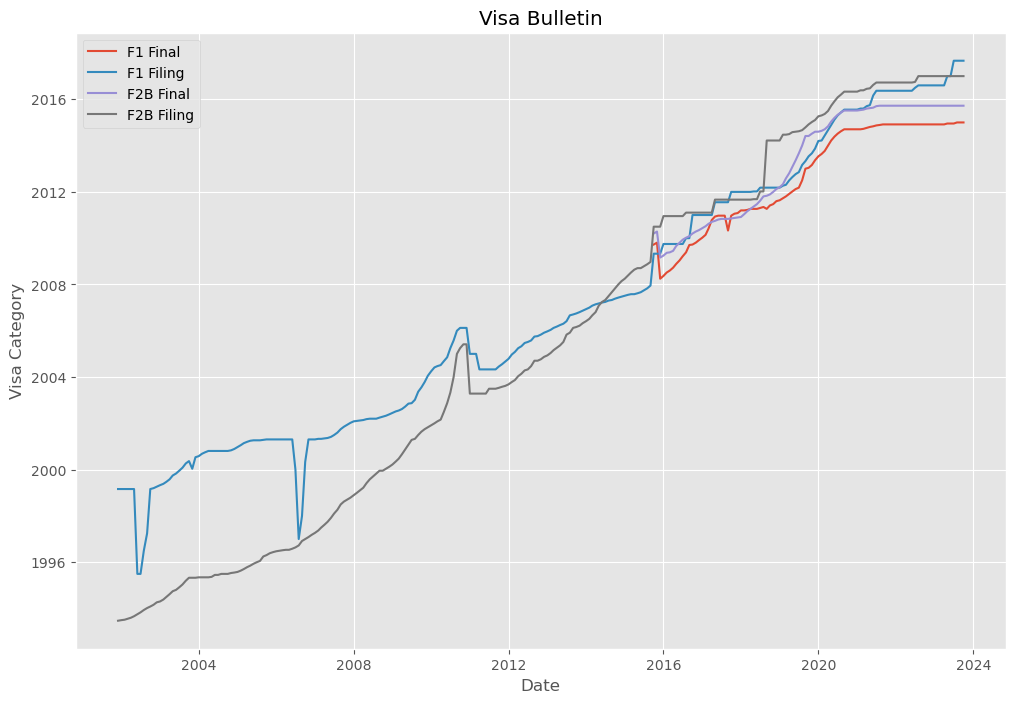

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


df = df.apply(pd.to_datetime, errors='coerce')


plt.figure(figsize=(12, 8))
plt.plot(df['Date'], df['F1 final'], label='F1 Final')
plt.plot(df['Date'], df['F1 filing'], label='F1 Filing')
plt.plot(df['Date'], df['F2B final'], label='F2B Final')
plt.plot(df['Date'], df['F2B filing'], label='F2B Filing')


plt.title('Visa Bulletin')
plt.xlabel('Date')
plt.ylabel('Visa Category')


plt.legend()


plt.show()


Enter the start date (YYYY-MM-DD): 2019-01-01
Enter the end date (YYYY-MM-DD): 2023-10-01
Enter the frequency interval for the x-axis in months: 3
Available categories to plot:
1: F1 final
2: F2A final
3: F2B final
4: 3rd final
5: 4th final
6: F1 filing
7: F2A filing
8: F2B filing
9: 3rd filing
10: 4th filing
Enter the numbers of the categories to plot (e.g., 1, 2, 3... comma-separated): 1,2,3,6,7,8


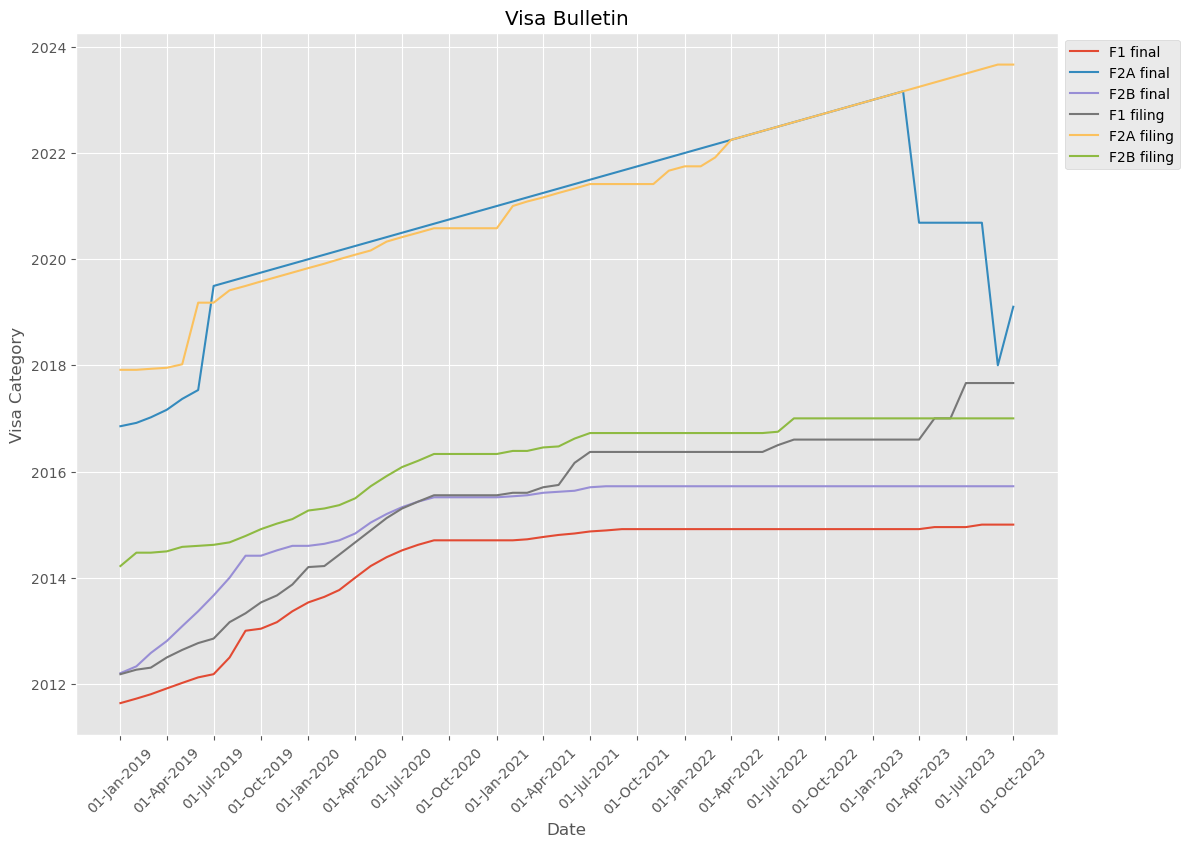

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df = df.apply(pd.to_datetime, errors='coerce')


start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")


start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

x_axis_interval = int(input("Enter the frequency interval for the x-axis in months: "))


categories = filtered_df.columns[1:]  


print("Available categories to plot:")
for i, category in enumerate(categories, start=1):
    print(f"{i}: {category}")

selected_categories = input("Enter the numbers of the categories to plot (e.g., 1, 2, 3... comma-separated): ")
selected_categories = [int(x) for x in selected_categories.split(",")]


plt.figure(figsize=(12, 8))
for category_choice in selected_categories:
    selected_category = categories[category_choice - 1]
    plt.plot(filtered_df['Date'], filtered_df[selected_category], label=selected_category)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=x_axis_interval))


plt.title('Visa Bulletin')
plt.xlabel('Date')
plt.ylabel('Visa Category')


plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.xticks(rotation=45)  
plt.show()


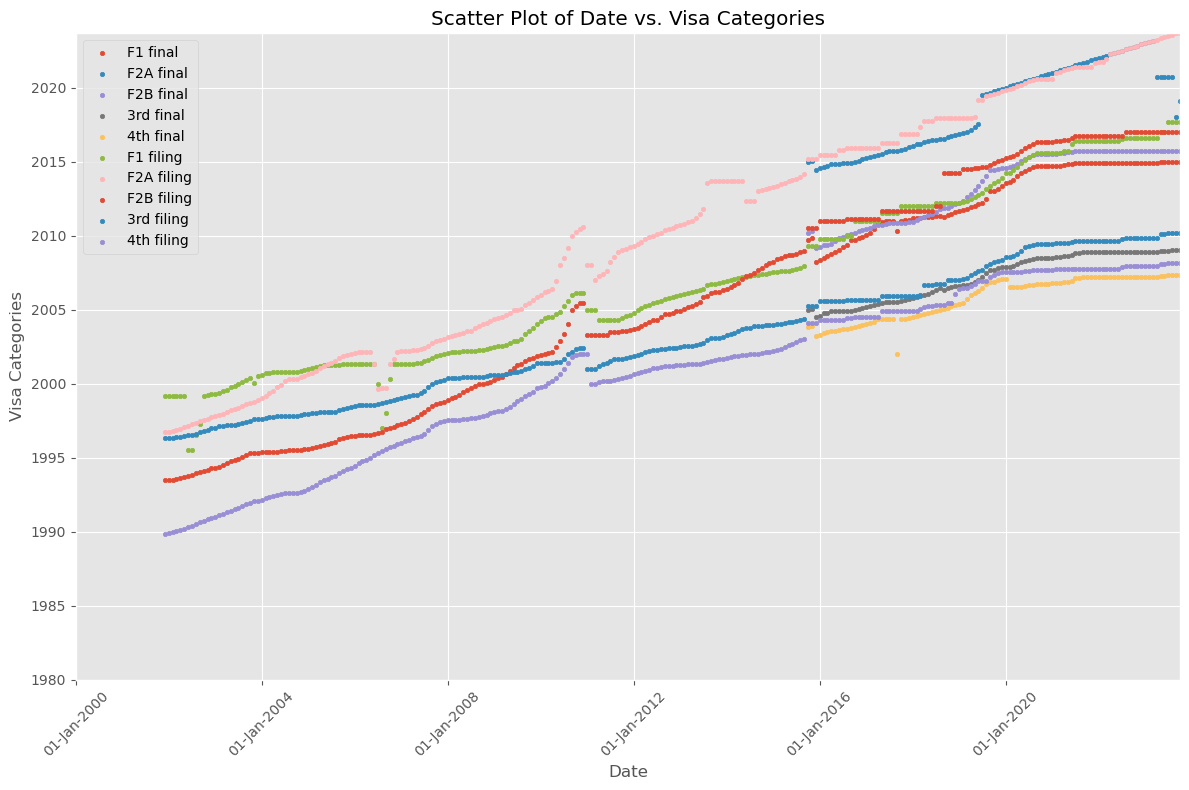

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

plt.figure(figsize=(12, 8))

x_start_date = pd.to_datetime('2000-01-01')
y_start_date = pd.to_datetime('1980-01-01')

for category in df.columns[1:]:
    plt.scatter(df['Date'], df[category], label=category, marker='o', s=10)


plt.xlim(x_start_date, df['Date'].max())
plt.ylim(y_start_date, df.iloc[:, 1:].max().max())


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))


plt.title('Scatter Plot of Date vs. Visa Categories')
plt.xlabel('Date')
plt.ylabel('Visa Categories')


plt.legend()


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
